In [1]:
from client import ActivationClient

In [2]:
ac = ActivationClient()

In [3]:
for batch in ac.stream_activations(batch_size=5000, max_batches=10):
    print(batch.shape)
    print('next batch')

20
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'


In [5]:
batch

NameError: name 'batch' is not defined

In [20]:
import time
start_time = time.time()
end_time = start_time + 30  # Run for 50 seconds
total_samples = 0
total_batches = 0

while time.time() < end_time:
    try:
        t, meta = ac.get_activations_tensor(5000)  # Request batch of 1000
        print(t.shape)
        total_samples += t.shape[0]  # Add actual samples received
        total_batches += 1
    except Exception as e:
        print(f"Error getting batch: {e}")
        time.sleep(0.1)  # Brief pause on error
        continue

duration = time.time() - start_time
print(f"In {duration:.1f} seconds:")
print(f"Total batches: {total_batches}")
print(f"Total samples: {total_samples}")
print(f"Samples/sec: {total_samples/duration:.1f}")
print(f"Batches/sec: {total_batches/duration:.1f}")

torch.Size([5000, 2, 12, 768])
torch.Size([5000, 2, 12, 768])
torch.Size([5000, 2, 12, 768])


KeyboardInterrupt: 

In [11]:
import time
start_time = time.time()
end_time = start_time + 50  # Run for 50 seconds
total_samples = 0
total_batches = 0

while time.time() < end_time:
    try:
        response = ac.get_activations(5000)  # Request batch of 1000
        total_samples += len(response['activations'])  # Add actual samples received
        total_batches += 1
    except Exception as e:
        print(f"Error getting batch: {e}")
        time.sleep(0.1)  # Brief pause on error
        continue

duration = time.time() - start_time
print(f"In {duration:.1f} seconds:")
print(f"Total batches: {total_batches}")
print(f"Total samples: {total_samples}")
print(f"Samples/sec: {total_samples/duration:.1f}")
print(f"Batches/sec: {total_batches/duration:.1f}")

KeyboardInterrupt: 

In [18]:
import torch
from torch.utils.data import Dataset, DataLoader
import time

class ActivationDataset(Dataset):
    def __init__(self, client, batch_size=5000):
        self.client = client
        self.batch_size = batch_size
        
    def __getitem__(self, idx):
        try:
            t, meta = self.client.get_activations_tensor(self.batch_size)
            return t
        except Exception as e:
            print(f"Error getting batch: {e}")
            return None
            
    def __len__(self):
        return 1000 # Arbitrary large number since we're streaming

# Create dataset and dataloader
dataset = ActivationDataset(ac)
dataloader = DataLoader(dataset, batch_size=None, num_workers=10, prefetch_factor=2)

start_time = time.time() 
end_time = start_time + 50  # Run for 50 seconds
total_samples = 0
total_batches = 0

for batch in dataloader:
    if time.time() >= end_time:
        break
        
    if batch is not None:
        total_samples += batch.shape[0]
        total_batches += 1

duration = time.time() - start_time
print(f"In {duration:.1f} seconds:")
print(f"Total batches: {total_batches}")
print(f"Total samples: {total_samples}")
print(f"Samples/sec: {total_samples/duration:.1f}")
print(f"Batches/sec: {total_batches/duration:.1f}")

In 55.8 seconds:
Total batches: 40
Total samples: 200000
Samples/sec: 3582.6
Batches/sec: 0.7


In [18]:
t, meta = ac.get_activations_tensor(900)
t.shape

HTTPError: 500 Server Error: Internal Server Error for url: http://localhost:8000/activations/tensor?num_samples=900

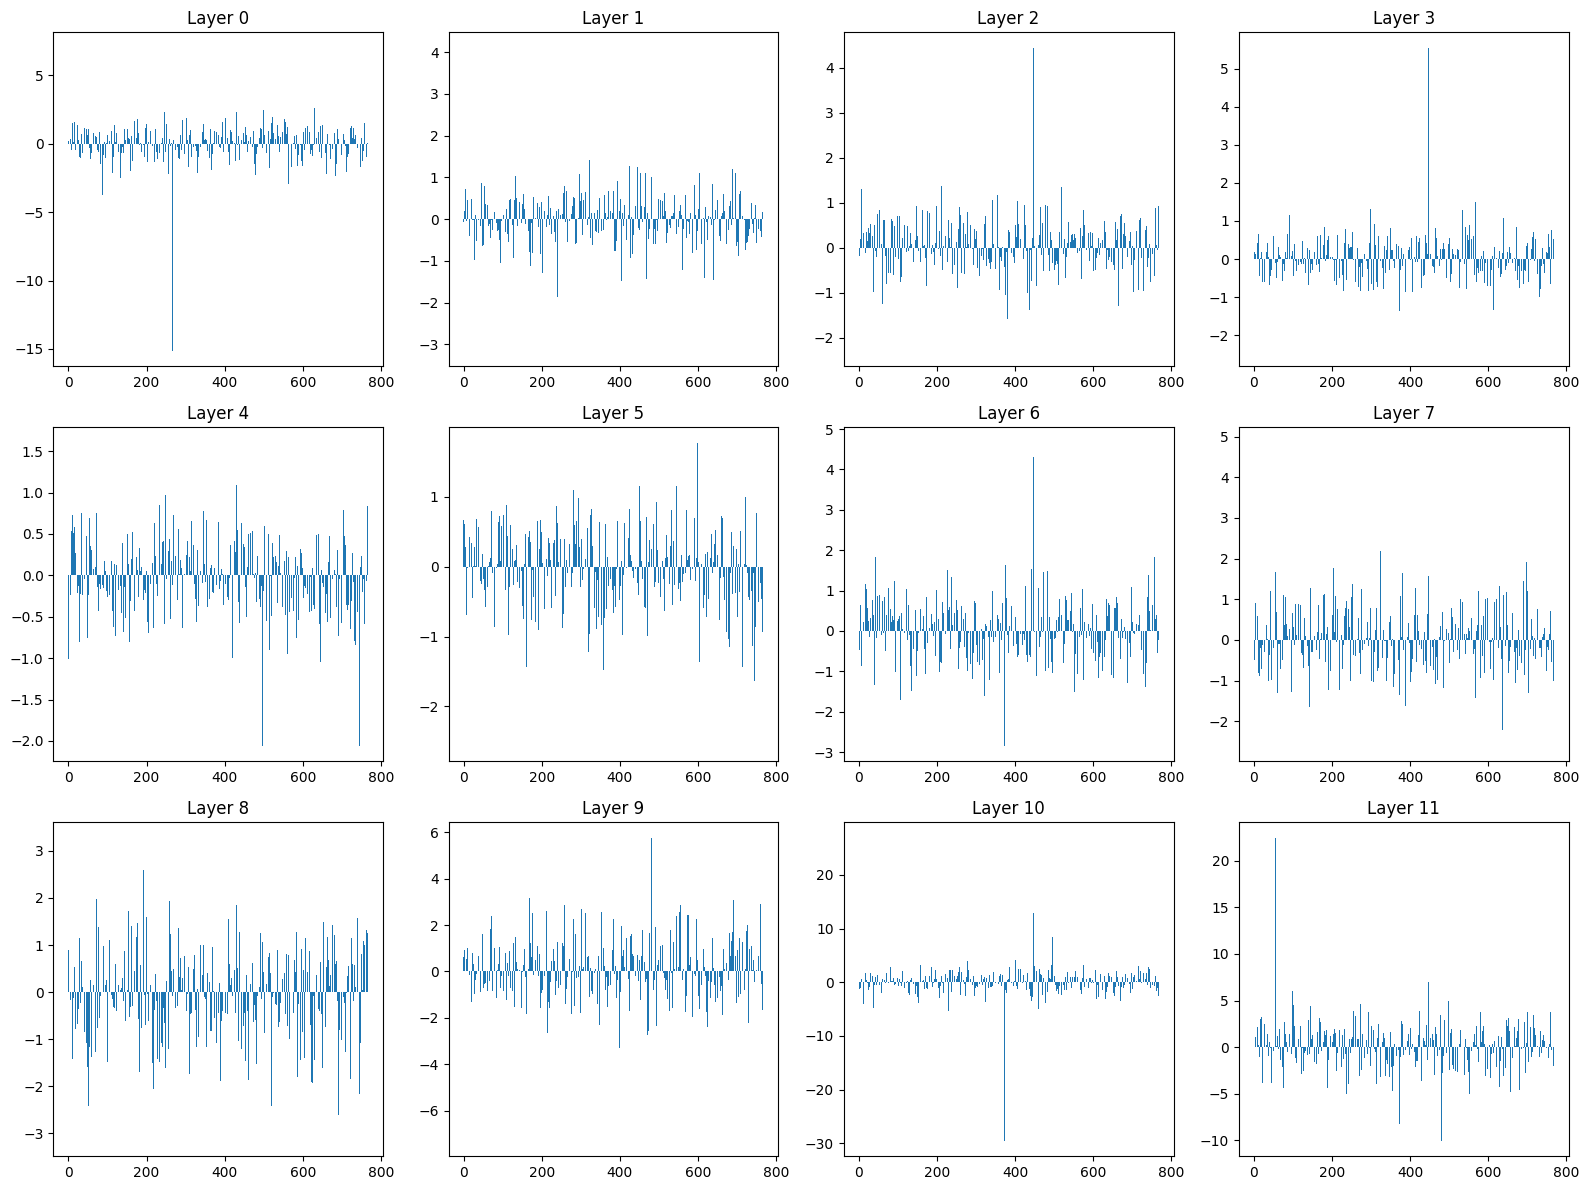

In [32]:
import matplotlib.pyplot as plt
import numpy as np
sample = t[10, 1]
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for layer in range(12):
    ax = axes[layer]
    ax.bar(height=sample[layer], x=np.arange(sample[layer].shape[0]))
    ax.set_title(f'Layer {layer}')

plt.tight_layout()
plt.show()